In [1]:
### Compare AVISO tidal current against observed 2023 SD-1042's band-pass semidiurnal tidal current
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import pyfes ### has to use newpycode
import os
import sys
from scipy.stats import pearsonr
path_nhchi = os.path.expanduser('~/Documents/projects/analytical-tools/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)

In [20]:
nt = int( 183*24*60/5 )
dtime_grid = np.array([datetime.datetime(2023,6,1)+datetime.timedelta(minutes=i*5) for i in range(nt)])
print(dtime_grid[0:3],dtime_grid[-1])
###
tlim_plot = [dtime_grid[0], dtime_grid[-1]]
nday_plot = (tlim_plot[1]-tlim_plot[0]).days+1
tticks = [tlim_plot[0]+datetime.timedelta(days=10*i) for i in range(nday_plot)]
tticks_label = [tticks[i].strftime('%m/%d') for i in range(len(tticks))]
print(tticks_label)
### fixed location - buoy C12's location
lon = -83.741
lat = 27.505

[datetime.datetime(2023, 6, 1, 0, 0) datetime.datetime(2023, 6, 1, 0, 5)
 datetime.datetime(2023, 6, 1, 0, 10)] 2023-11-30 23:55:00
['06/01', '06/11', '06/21', '07/01', '07/11', '07/21', '07/31', '08/10', '08/20', '08/30', '09/09', '09/19', '09/29', '10/09', '10/19', '10/29', '11/08', '11/18', '11/28', '12/08', '12/18', '12/28', '01/07', '01/17', '01/27', '02/06', '02/16', '02/26', '03/07', '03/17', '03/27', '04/06', '04/16', '04/26', '05/06', '05/16', '05/26', '06/05', '06/15', '06/25', '07/05', '07/15', '07/25', '08/04', '08/14', '08/24', '09/03', '09/13', '09/23', '10/03', '10/13', '10/23', '11/02', '11/12', '11/22', '12/02', '12/12', '12/22', '01/01', '01/11', '01/21', '01/31', '02/10', '02/20', '03/02', '03/12', '03/22', '04/01', '04/11', '04/21', '05/01', '05/11', '05/21', '05/31', '06/10', '06/20', '06/30', '07/10', '07/20', '07/30', '08/09', '08/19', '08/29', '09/08', '09/18', '09/28', '10/08', '10/18', '10/28', '11/07', '11/17', '11/27', '12/07', '12/17', '12/27', '01/06', '01

In [21]:
### Use pyfes tool box to build the tide model
path_aviso = os.path.expanduser('~/Documents/Data/AVISO/auxiliary/tide_model/fes2014/')
ConfigFileU = path_aviso+'eastward_velocity.ini'
ConfigFileV = path_aviso+'/northward_velocity.ini'
eastward_velocity = pyfes.Handler("ocean","memory",ConfigFileU)
northward_velocity = pyfes.Handler("ocean", "memory",ConfigFileV)

### 
u_AVISO_tide = np.nan*np.ones( dtime_grid.shape )
v_AVISO_tide = u_AVISO_tide.copy()
for i in range( len(dtime_grid) ):
    u_AVISO_tide[i],_,_ = eastward_velocity.calculate(np.array([lon]),np.array([lat]),np.array([dtime_grid[i]]))
    v_AVISO_tide[i],_,_ = northward_velocity.calculate(np.array([lon]),np.array([lat]),np.array([dtime_grid[i]]))

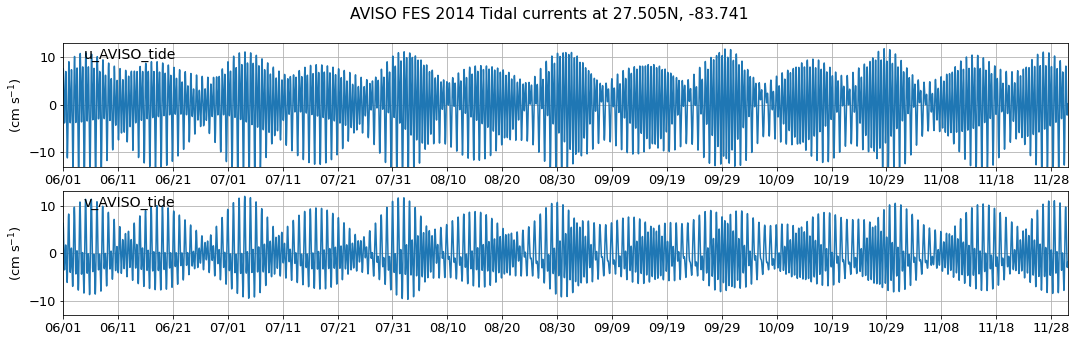

In [22]:
vars_plot = ['u_AVISO_tide','v_AVISO_tide']
nrow = len(vars_plot)
plt.clf()
plt.gcf().set_size_inches(18, 5)
plt.rcParams.update({'font.size': 13})
for i in range( nrow ):
    plt.subplot(nrow,1,i+1)
    plt.plot( dtime_grid, eval(vars_plot[i]))
    plt.grid()
    plt.xticks(tticks)
    plt.gca().set_xticklabels(tticks_label)
    plt.xlim(tlim_plot)
    plt.ylim([-13,13])
    plt.gca().text(0.02,0.85,vars_plot[i],ha='left',va='bottom',transform=plt.gca().transAxes,fontsize=14)
    plt.ylabel('(cm s$^{-1}$)')
plt.suptitle('AVISO FES 2014 Tidal currents at {:.3f}N, {:.3f}'.format(lat, lon))
###
plt.savefig('timeseries_tidal-uv_AVISO_fes2014_({:.3f}N_{:.3f})'.format(lat, lon)+\
                tlim_plot[0].strftime('%Y%m%d-')+tlim_plot[1].strftime('%m%d')+'.png',dpi=400,bbox_inches='tight')